In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as py
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [29]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,potensi meninggal
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [30]:
ds = dataset.copy()

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  potensi meninggal         299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


###### Sex - Gender of patient Male = 1, Female =0
###### Age - Age of patient 
###### Diabetes - 0 = No, 1 = Yes 
###### Anaemia - 0 = No, 1 = Yes 
###### High_blood_pressure - 0 = No, 1 = Yes 
###### Smoking - 0 = No, 1 = Yes 
###### Potensi meninggal - 0 = sembuh, 1 = meninggal

In [32]:
# cek data null
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
potensi meninggal           0
dtype: int64

In [33]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.829431,11.894997,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

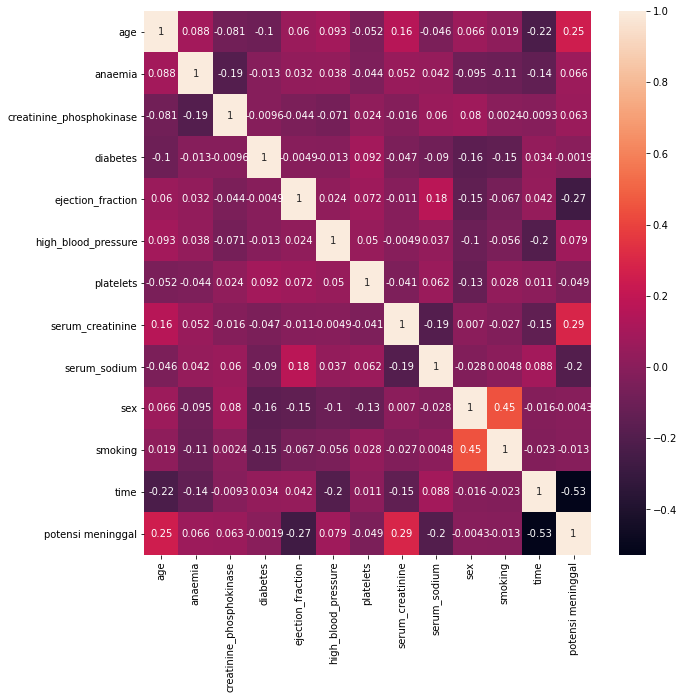

In [34]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

#### Melihat hasil dari heatmap di atas mendapatkan hasil fitur seleksi dimana data yang akan digunakan adalah data yang memiliki nilai kolerasi dengan "potensi meninggal"  > 0.25 yaitu "age", "ejection_fraction", "serum_creatinine" dan "time"

# visualisasi dan data cleaning

In [35]:
ds.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,potensi meninggal
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:xlabel='age'>

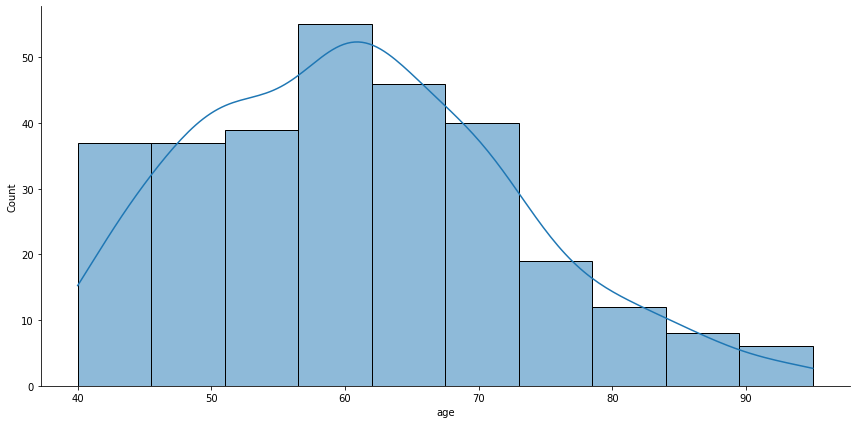

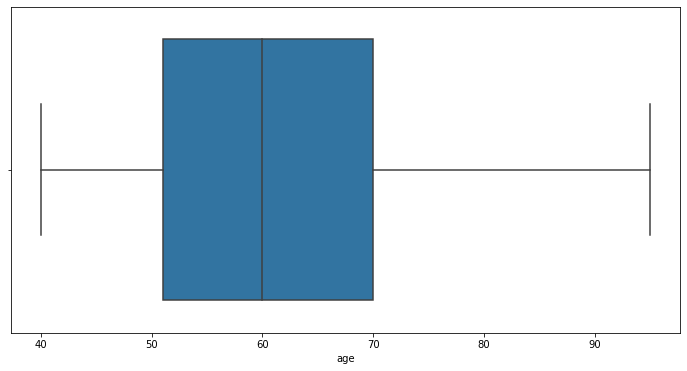

In [36]:
# visualisasi data "age"
sns.displot(x = 'age', data = ds, aspect = 2, height = 6, kde = True);
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='age', data = ds)

<AxesSubplot:xlabel='ejection_fraction'>

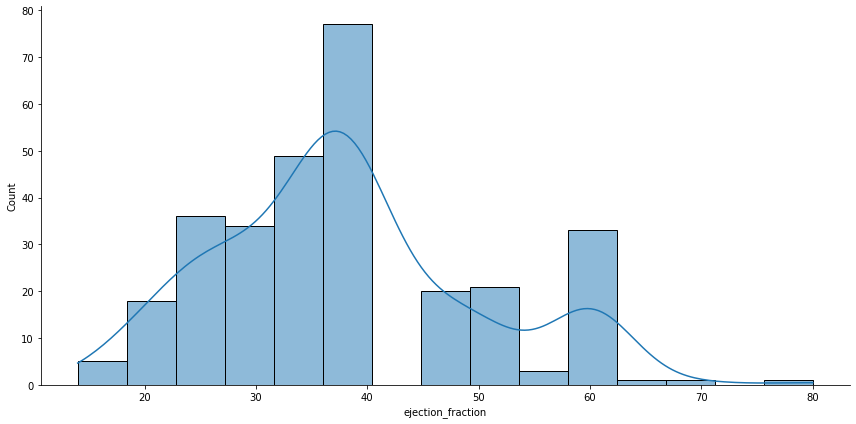

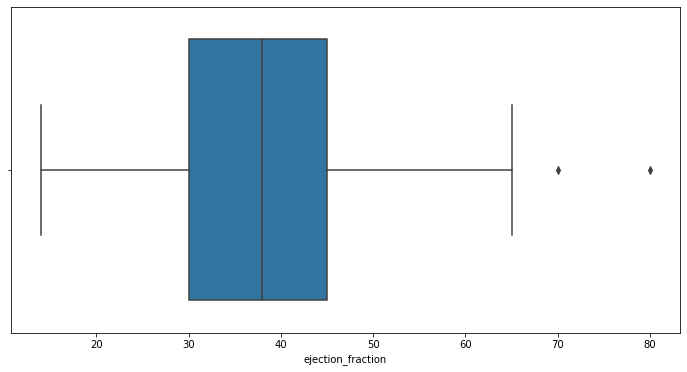

In [37]:
# visualisasi data "ejection_fraction"
sns.displot(x = 'ejection_fraction', data = ds, aspect = 2, height = 6, kde = True);
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='ejection_fraction', data = ds)

<AxesSubplot:xlabel='serum_creatinine'>

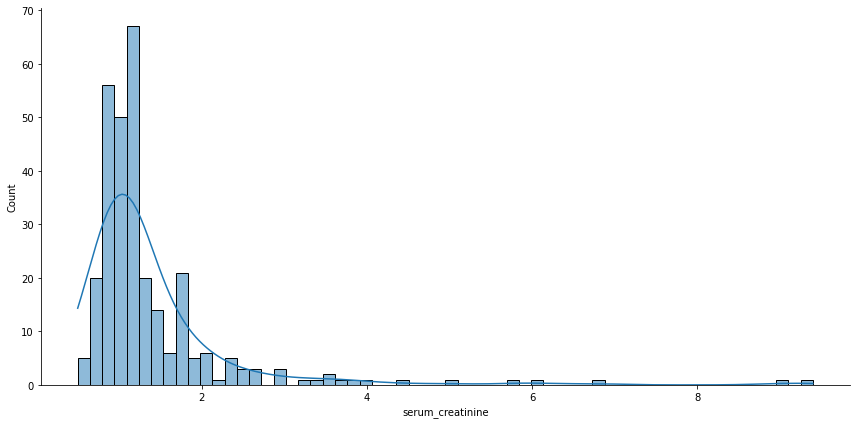

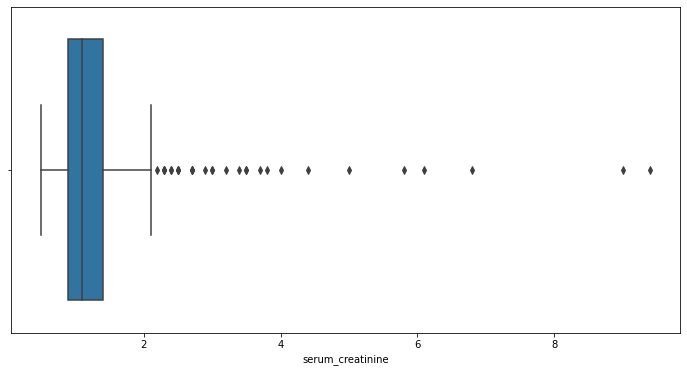

In [38]:
sns.displot(x = 'serum_creatinine', data = ds, aspect = 2, height = 6, kde = True);
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='serum_creatinine', data = ds)

#### terdapat outlier pada data serum_creatinine

In [39]:
# mencari Q1(25 percentile) and Q3(75 percentile)
q1 = ds["serum_creatinine"].quantile(0.25)
q2 = ds["serum_creatinine"].quantile(0.75)

In [40]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1

In [41]:
# menentukan max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

In [42]:
# memasukan data outlier ke dalam batas yang telah di tentukan
ds['serum_creatinine'] = pd.DataFrame(np.where(ds["serum_creatinine"] > max_limit, max_limit, 
         (np.where(ds["serum_creatinine"] < min_limit, min_limit, ds["serum_creatinine"]))), columns=["serum_creatinine"])

<AxesSubplot:xlabel='serum_creatinine'>

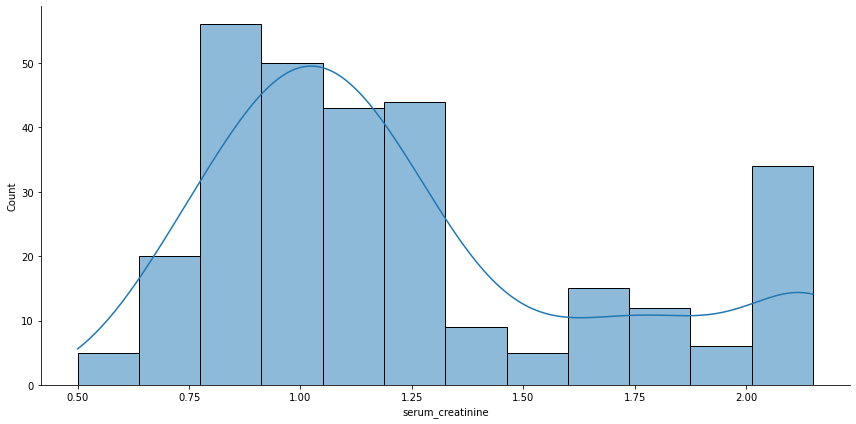

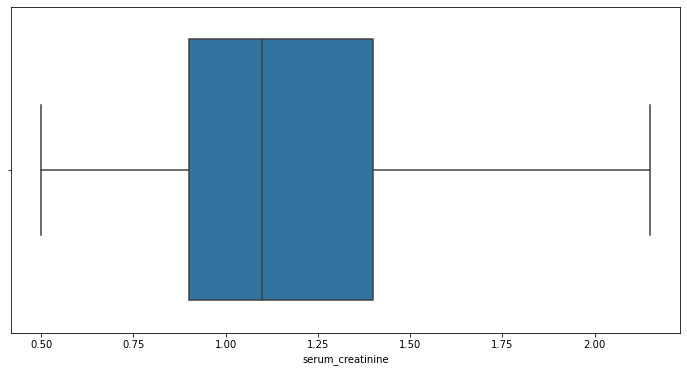

In [43]:
sns.displot(x = 'serum_creatinine', data = ds, aspect = 2, height = 6, kde = True);
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='serum_creatinine', data = ds)

#### outlier telah di perbaiki

<AxesSubplot:xlabel='time'>

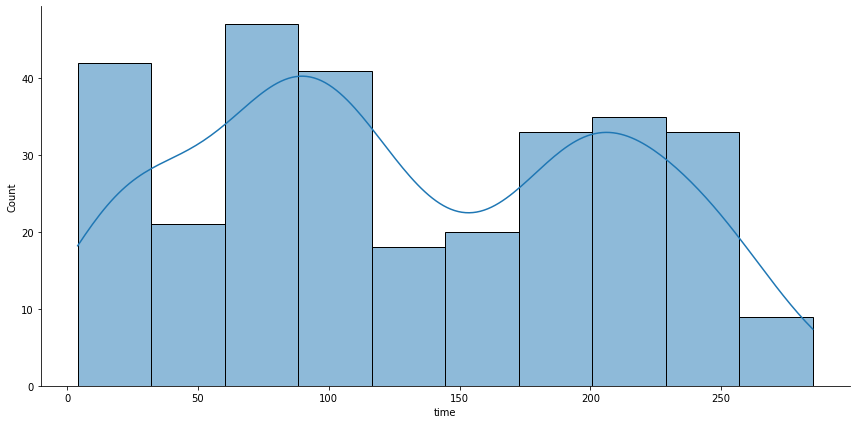

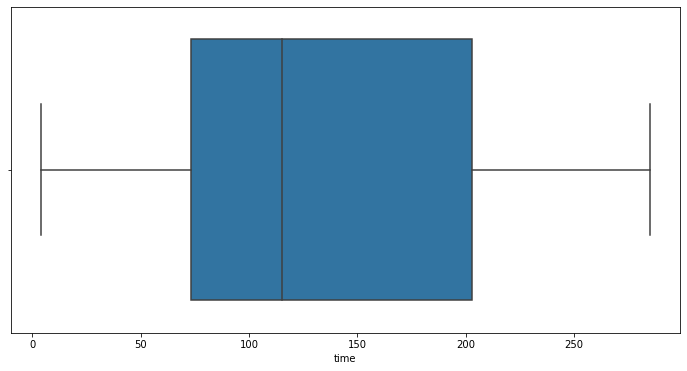

In [44]:
# visualisasi data "time"
sns.displot(x = 'time', data = ds, aspect = 2, height = 6, kde = True);
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='time', data = ds)

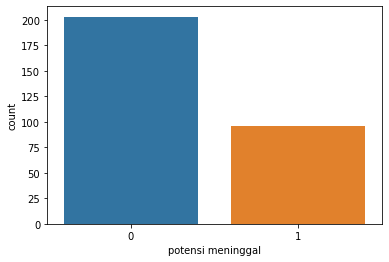

In [45]:
# visualisasi data "potensi meninggal"
sns.countplot(x = 'potensi meninggal', data = ds);

# Selecting Feature (X) and target Variable (y)

In [46]:
data = ds[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time','potensi meninggal']]
data["potensi meninggal"] = ds["potensi meninggal"].astype("int")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,potensi meninggal
0,75,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.15,116,0,0,8,1


In [47]:
X = np.asanyarray(data[['age','ejection_fraction','serum_creatinine','time']])
X

array([[ 75. ,  20. ,   1.9,   4. ],
       [ 55. ,  38. ,   1.1,   6. ],
       [ 65. ,  20. ,   1.3,   7. ],
       ...,
       [ 45. ,  60. ,   0.8, 278. ],
       [ 45. ,  38. ,   1.4, 280. ],
       [ 50. ,  45. ,   1.6, 285. ]])

In [48]:
y = np.asanyarray(data['potensi meninggal'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
#normalisasi data
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.19330213, -1.53055953,  1.51466529, -1.62950241],
       [-0.49089583, -0.00707675, -0.30616061, -1.60369074],
       [ 0.35120315, -1.53055953,  0.14904587, -1.5907849 ],
       ...,
       [-1.33299481,  1.85495776, -0.98897032,  1.90669738],
       [-1.33299481, -0.00707675,  0.3766491 ,  1.93250906],
       [-0.91194532,  0.58538877,  0.83185558,  1.99703825]])

## Splitting Database

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 27)

In [51]:
print("Train Set:",X_train.shape,y_train.shape)
print("Test Set:",X_test.shape,y_test.shape)

Train Set: (179, 4) (179,)
Test Set: (120, 4) (120,)


## Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.01, solver = "liblinear").fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [53]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

yhat_prob berfungsi mengembalikan perkiraan untuk semua kelas, diurutkan oleh label kelas. Jadi, kolom pertama adalah peluang kelas 1, P(Y=1|X), dan kolom kedua adalah peluang kelas 0, P(Y=0|X)

In [54]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.60267139, 0.39732861],
       [0.46026636, 0.53973364],
       [0.67307692, 0.32692308],
       [0.35449993, 0.64550007],
       [0.62515304, 0.37484696],
       [0.6096444 , 0.3903556 ],
       [0.54698475, 0.45301525],
       [0.49714368, 0.50285632],
       [0.66799461, 0.33200539],
       [0.70851505, 0.29148495],
       [0.62153967, 0.37846033],
       [0.64307594, 0.35692406],
       [0.49229236, 0.50770764],
       [0.43081117, 0.56918883],
       [0.58978103, 0.41021897],
       [0.43717793, 0.56282207],
       [0.4335859 , 0.5664141 ],
       [0.54923963, 0.45076037],
       [0.69889647, 0.30110353],
       [0.38941137, 0.61058863],
       [0.46163979, 0.53836021],
       [0.63254241, 0.36745759],
       [0.72482352, 0.27517648],
       [0.61996224, 0.38003776],
       [0.6005607 , 0.3994393 ],
       [0.66272944, 0.33727056],
       [0.29867969, 0.70132031],
       [0.35344285, 0.64655715],
       [0.56540677, 0.43459323],
       [0.48734336, 0.51265664],
       [0.

In [55]:
cnf_matrix=confusion_matrix(y_test,yhat,labels=[0,1])
Lr_acc = accuracy_score(y_test, yhat)
print(f"Training Accuracy of Logistic Regression Classifier is {accuracy_score(y_train, LR.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression Classifier is {Lr_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, LR.predict(X_test))}\n")
np.set_printoptions(precision = 2)
print(classification_report(y_test,yhat))

Training Accuracy of Logistic Regression Classifier is 0.8212290502793296
Test Accuracy of Logistic Regression Classifier is 0.8416666666666667 

Confusion Matrix :- 
[[75  8]
 [11 26]]

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        83
           1       0.76      0.70      0.73        37

    accuracy                           0.84       120
   macro avg       0.82      0.80      0.81       120
weighted avg       0.84      0.84      0.84       120



# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of NB

gnb_acc = accuracy_score(y_test, gnb.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, gnb.predict(X_train))}")
print(f"Test Accuracy of KNN is {gnb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gnb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gnb.predict(X_test))}")

Training Accuracy of KNN is 0.8268156424581006
Test Accuracy of KNN is 0.8333333333333334 

Confusion Matrix :- 
[[75  8]
 [12 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        83
           1       0.76      0.68      0.71        37

    accuracy                           0.83       120
   macro avg       0.81      0.79      0.80       120
weighted avg       0.83      0.83      0.83       120



# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8491620111731844
Test Accuracy of KNN is 0.825 

Confusion Matrix :- 
[[74  9]
 [12 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.74      0.68      0.70        37

    accuracy                           0.82       120
   macro avg       0.80      0.78      0.79       120
weighted avg       0.82      0.82      0.82       120

